This project explores a dataset of used cars collected from Cars24, an online resale platform. The data contains details such as year of manufacture, car model, fuel type, transmission, ownership history, kilometers driven, location, and the resale price in lakhs. My main goal is to understand what factors drive the resale value of cars and My target variable is Price. 

***Import Libraries***

In [1]:
# Importing Libraries I began by importing the core Python libraries required for data preprocessing, analysis, and visualization. 

import pandas as pd # Data manipulation and analysis.
import numpy as np # Numerical operations and array handling.
import matplotlib.pyplot as plt # More control, lower-level, basic plotting.
import seaborn as sns
from scipy import stats # Statistical functions and tests.

pd.set_option('display.max_columns', None) # Display all columns in DataFrame output.
pd.set_option('display.max_rows', None) # Display all rows in DataFrame output.

***Download Database***

In [2]:
# Load data from CSV file 
# this reads the database into a pandas DataFrame which will serve as foundation for all subsequent analysis and modeling tasks. 
df=pd.read_csv('data/Cars24.csv')

***Get Information about Database***

In [3]:
# Display the first 5 rows of the dataset
# This gives a quick preview of the data's structure, including column names, data types, and sample values.
# It helps confirm whether the dataset was loaded correctly and if the expected columns are present.
df.head()



,Year,Car Model,Car Variant,KM Driven,Fuel Type,Transmission Type,Ownership,Price(in Lakhs),Location
0,2015,Maruti Swift,ZDI,60660,Diesel,Manual,1st owner,2.79,Suryamani Nagar Agartala Tripura
1,2019,Maruti Swift Dzire,TOUR S PETROL,150000,Petrol,Manual,2nd owner,3.57,Jogendra Nagar Agartala
2,2021,Mahindra XUV500,W11,48700,Diesel,Manual,2nd owner,11.63,Ram Nagar Agartala Tripura
3,2015,Maruti OMNI E,8 STR,55800,Petrol,Manual,3rd owner,1.46,Dhaleswar Agartala Tripura
4,2010,Volkswagen Vento,HIGHLINE 1.6 MPI,49320,Petrol,Manual,1st owner,1.79,Badharghat Agartala


In [4]:
#Return number of rows and columns in the DataFrame
df.shape

(9176, 9)

In [5]:
#Return information about the DataFrame, Including data types and non-null counts.
df.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9176 entries, 0 to 9175
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               9176 non-null   int64  
 1   Car Model          9176 non-null   object 
 2   Car Variant        9176 non-null   object 
 3   KM Driven          9176 non-null   int64  
 4   Fuel Type          9176 non-null   object 
 5   Transmission Type  9176 non-null   object 
 6   Ownership          9176 non-null   object 
 7   Price(in Lakhs)    9175 non-null   float64
 8   Location           9173 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 645.3+ KB


The dataset contains 9176 rows and 9 columns.There is a mix of data types:

Numerical: Year, KM Driven, Price(in Lakhs)

Categorical (object type): Car Model, Car Variant, Fuel Type, Transmission Type, Ownership, Location

Categorical columns will require encoding if I intend to use them later in predictive modeling. Only a few missing values exist—1 in Price and 3 in Location—which will need to be handled. Next step would be handle missing values appropriately, Check for outliers in numerical features such as KM Driven and Price(in Lakhs).

In [6]:
# Return summary statistics for numerical columns in the DataFrame
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Year,9176.0,2017.147777,3.992440,2001.0,2014.0,2017.00,2021.00,2025.0
KM Driven,9176.0,89533.652354,395485.704208,1.0,44735.0,75680.00,110000.00,37270000.0
Price(in Lakhs),9175.0,6.105006,5.334563,0.3,2.7,4.61,7.59,67.0


The summary statistics show that car manufacturing years range from 2001 to 2025, with a median of 2017.  
The 'KM Driven' column has a median of 75,680 km, but the maximum value (37 million km) suggests extreme outliers.   
Car prices are mostly between 0.3 and 67 lakhs. The mean (6.1) is higher than the median (4.6), which shows that a few expensive cars are pulling the average up.


***Handle Duplicates*** 

In this dataset, each row represents a car listing. My focus in handling duplicates is to verify that there are no fully duplicated rows where all features (Model, Variant, Year, KM Driven, Fuel Type, Transmission, Ownership, Location, and Price) are identical.

Duplicate values within individual features are expected. For example, categorical columns such as Fuel Type, Transmission Type, and Ownership will naturally repeat, since many cars share the same characteristics. These are not considered problematic duplicates.


In [7]:
# Show columns of dataset
df.columns

Index(['Year', 'Car Model', 'Car Variant', 'KM Driven', 'Fuel Type',
       'Transmission Type', 'Ownership', 'Price(in Lakhs)', 'Location'],
      dtype='object')

In [8]:
# Check for any rows that are completely duplicated across all columns
#full duplicate check 
duplicate_rows = df.duplicated().sum()
print(f"Number of fully identical rows: {duplicate_rows}")


Number of fully identical rows: 337


***In my dataset, I found 337 fully identical rows, which I dropped to ensure that each car listing is unique.*** 

Next, I reviewed the dataset for any irrelevant data. Irrelevant features are those that do not contribute meaningfully to the analysis or prediction task. For example, in a car sales dataset, this could include seller contact details if present. In my case, since the dataset mainly contains relevant car attributes, most columns are retained at this stage.
I also examined duplicates on a subset ('Car Model', 'Location') and found 1567 cases; these reflect legitimate listings that differ in other attributes (e.g., year, mileage, price), so they were retained. This approach removes only true duplicates, prevents bias/leakage, and preserves genuine variation in the data.you can see this in my other file where i was following tutorial work.




In [9]:
#drop duplicates 
df = df.drop_duplicates().reset_index(drop=True) 

In [10]:
#Verify the database again
print(f"After dropping, shape of dataset: {df.shape}")

After dropping, shape of dataset: (8839, 9)


In [11]:
#check the duplicates again
print(f"duplicates:{df.duplicated().sum()}")

duplicates:0


After running 'drop_duplicates()', the dataset shape reduced from (9176, 9) to (8839, 9).  
A follow-up duplicate check confirmed that there are now 0 duplicate rows remaining.  
This ensures each record represents a unique car listing.


***Handle Irrelavant Data***  
I checked the dataset for irrelevant data. This included searching for ID-like columns (which serve only as identifiers) and constant features (columns with the same value for all rows).  
In this dataset, all columns represent meaningful attributes of cars (year, model, mileage, fuel, transmission, ownership, location, and price).  
The check for constant features returned an empty list, confirming that no irrelevant data needed to be removed.



In [12]:
# Check for any constant features (columns with only one unique value like all rows= petrol)
constant_features = [col for col in df.columns if df[col].nunique() == 1]
print("Constant features:", constant_features)


Constant features: []


***Handle Missing Values*** 

In [13]:
# Display the DataFrame having missing data.
df_missing_data = df[df.isnull().any(axis=1)]
df_missing_data.shape

(4, 9)

In [14]:
df_missing_data.tail()

,Year,Car Model,Car Variant,KM Driven,Fuel Type,Transmission Type,Ownership,Price(in Lakhs),Location
413,2018,Hyundai i20 Active,1.2 S,87770,Petrol,Manual,2nd owner,4.25,NaN
4443,2013,Hyundai i20,SPORTZ 1.4 CRDI,140000,Diesel,Manual,3rd owner,2.24,NaN
5591,2021,KIA SONET,GTX PLUS 1.5 AT,61640,Diesel,Auto,1st owner,10.35,NaN
8242,2024,BMW 7 Series,740i M Sport,12360,Petrol,Auto,1st owner,NaN,"Ashok Vihar Rd, Block C, Phase 2, New Delhi"


In [15]:
# Show columns with mostly values more that x% missing values
threshold = 5
print(f"Total records {df.shape[0]}")
print("*"* 10)
for col in df.columns:
    missing_count = df[col].isnull().sum()
    missing_ratio = (missing_count / df.shape[0]) * 100
    if missing_ratio > threshold:
        print(f"Column: {col} has {missing_count} missing values ({missing_ratio: 2f}%)")
        print("*"* 10)

Total records 8839
**********


printing missing values in database 

In [16]:
print(df.isnull().sum())


Year                 0
Car Model            0
Car Variant          0
KM Driven            0
Fuel Type            0
Transmission Type    0
Ownership            0
Price(in Lakhs)      1
Location             3
dtype: int64


In [17]:
# Drop rows with missing values
df_dropna = df.dropna()
print("Dropped rows with missing values. Shape after drop:", df_dropna.shape)

#Impute missing values
df_impute = df.copy()

# Impute Price(in Lakhs) with median
df_impute['Price(in Lakhs)'] = df_impute['Price(in Lakhs)'].fillna(df_impute['Price(in Lakhs)'].median())
print("Imputed 'Price(in Lakhs)' with the median value.")

# Impute Location with mode (most frequent city)
df_impute['Location'] = df_impute['Location'].fillna(df_impute['Location'].mode()[0])
print("Imputed 'Location' with the mode (most common city).")

# Check nulls after imputation
print("\nMissing values count after imputation:")
print(df_impute[['Price(in Lakhs)', 'Location']].isnull().sum())


Dropped rows with missing values. Shape after drop: (8835, 9)
Imputed 'Price(in Lakhs)' with the median value.
Imputed 'Location' with the mode (most common city).

Missing values count after imputation:
Price(in Lakhs)    0
Location           0
dtype: int64


I demonstrated both dropping and imputing missing values. Dropping rows is the simplest approach and can be suitable when only a very small number of records are affected. However, this reduces the dataset size. Imputation is usually preferred because it retains all records while handling the missing data logically.  

In my dataset, there were only 4 missing values (1 in 'Price(in Lakhs)' and 3 in 'Location'). Either method was valid, but I chose to continue with imputation. I filled the missing  Price(in Lakhs)  with the median value (to avoid distortion from outliers) and the missing 'Location' with the mode (the most frequent city).


Handeling Outliners

When checking for outliers in my dataset, I decided to use the Interquartile Range (IQR) method. 
IQR method uses the 25th percentile (Q1), 75th percentile (Q3), and the median to define the spread of the data. In short, IQR provides a more stable way to flag unusually expensive luxury cars or very high-mileage vehicles in this dataset.

In [18]:
#Grab outliers because outliers are the extreme value or significantly 
#different from other values in the dataset. In regression analysis, outliers can lead to inaccurate and unreliable prediction results. 
# create function to caculate a column name, and returns the lower and upper outlier boundaries based on the IQR method
# IQR (Interquartile Range): 
#Lower bound = Q1-1.5*IQR
#Upper bound = Q!+1.5*IQR 
#Any value outside these bounds is considered an outliner

def find_outliers_IQR_method(input_df, variable):
    IQR = input_df[variable].quantile(0.75) - input_df[variable].quantile(0.25)

    lower_limit = input_df[variable].quantile(0.25) - (IQR * 1.5)
    upper_limit = input_df[variable].quantile(0.75) + (IQR * 1.5)

    return lower_limit, upper_limit



In [19]:
#Find lower and upper limit for 
feature = 'KM Driven'
lower, upper = find_outliers_IQR_method(df, feature)
lower, upper

(np.float64(-50637.5), np.float64(206382.5))

In [20]:
feature = "Price(in Lakhs)"
lower,upper = find_outliers_IQR_method(df,feature)
lower,upper

(np.float64(-4.695), np.float64(14.945))

***insight***
When applying the IQR method, both 'KM Driven' and 'Price(in Lakhs)' outliner were detected. 
For 'KM Driven', the practical bounds was 207,897 km. Cars with mileage above this range were flagged as potential outliers.  
For 'Price(in Lakhs)', the practical bounds was 14.9 lakhs. Cars priced above this threshold were considered unusually high for second hand car.  
Negetive lower bounds are meaningless for the database. 
***Decision***
I will try both mathods next Removing Outliners (can be ideal for big databases) and Capping them 
High outliers in this dataset (very expensive luxury cars or vehicles with extremely high mileage) are not data errors but genuine cases in the second-hand market. Deleting them would remove important information about the upper extremes of resale values.

Instead, I chose capping: values above the IQR upper bound are replaced with the bound, while negative lower bounds are ignored since the minimum realistic value is zero. This approach keeps the fact that a car was unusually expensive or heavily used, but prevents these few records from disproportionately skewing the analysis and models.
                                                    


In [21]:
#Remove outliers 
df_cleaned = df[(df[feature] > lower)&(df[feature] < upper)]

print(f'Cleaned dataset : {df_cleaned.shape}')
print(f'Outliers count : {len(df)-len(df_cleaned)}')


Cleaned dataset : (8290, 9)
Outliers count : 549


Initially I tried ***removing outliers***, but since extreme values are genuine (luxury/high mileage cars), I switched to capping, which limits their statistical leverage without deleting real cases.I will run IQR method again. 

In [22]:
def find_outliers_IQR_method(input_df, variable):
    IQR = input_df[variable].quantile(0.75) - input_df[variable].quantile(0.25)

    lower_limit = input_df[variable].quantile(0.25) - (IQR * 1.5)
    upper_limit = input_df[variable].quantile(0.75) + (IQR * 1.5)

    return lower_limit, upper_limit


# Make a copy of original database, I learnt a lesson earlier and don't want to play around with original again
df_capped = df.copy()

# Columns to cap
cols_to_cap = ['KM Driven', 'Price(in Lakhs)']

for col in cols_to_cap:
    lower, upper = find_outliers_IQR_method(df_capped, col)   # ✅ fixed
    # Cap values outside the bounds
    df_capped[col] = df_capped[col].clip(lower=lower, upper=upper)

    print(f"\nColumn: {col}")
    print(f" - Lower limit: {lower:.2f}")
    print(f" - Upper limit: {upper:.2f}")
    print(f" - Min after capping: {df_capped[col].min():.2f}")
    print(f" - Max after capping: {df_capped[col].max():.2f}")




Column: KM Driven
 - Lower limit: -50637.50
 - Upper limit: 206382.50
 - Min after capping: 1.00
 - Max after capping: 206382.50

Column: Price(in Lakhs)
 - Lower limit: -4.70
 - Upper limit: 14.95
 - Min after capping: 0.30
 - Max after capping: 14.95


*** Probability plots before and after handling outliner ***


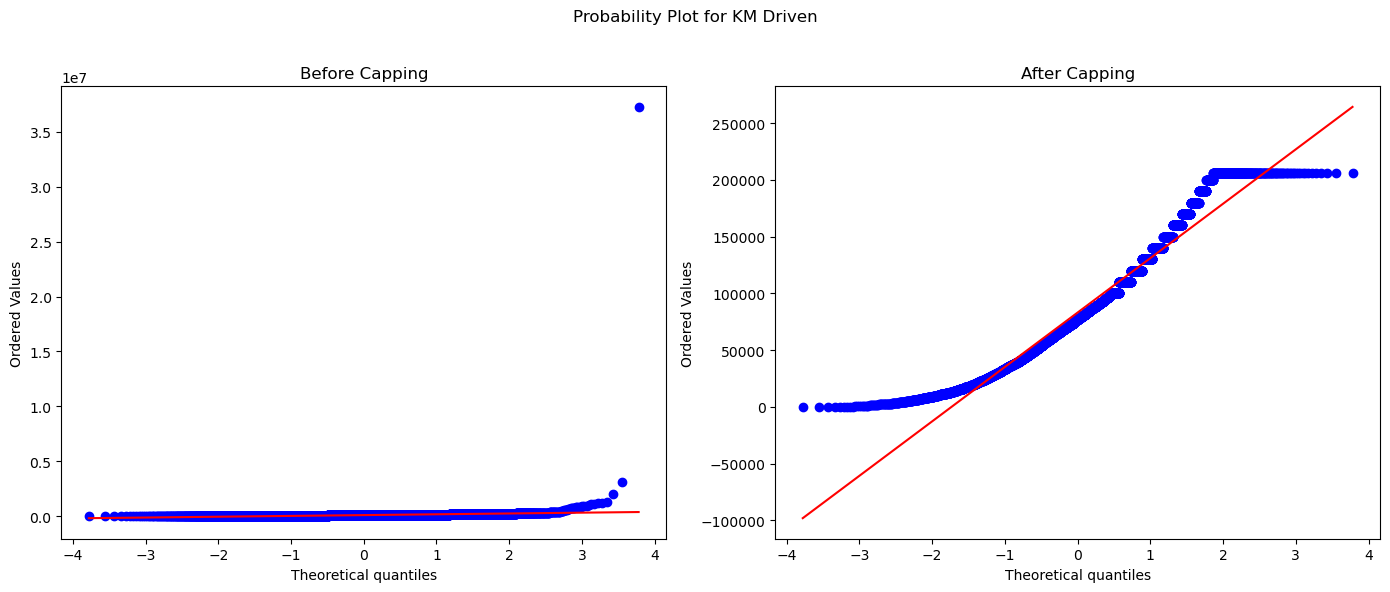

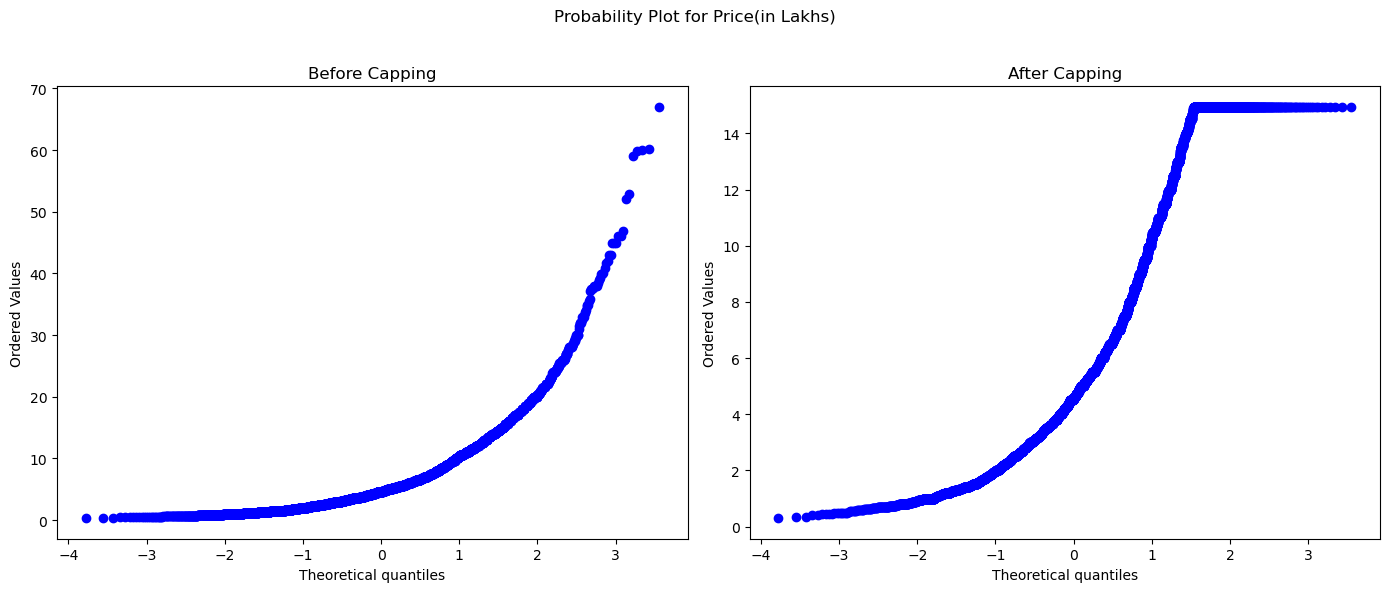

In [23]:
#list of columns to visualize
cols_to_visualize = ['KM Driven', 'Price(in Lakhs)']
for feature in ['KM Driven', 'Price(in Lakhs)']:
    plt.figure(figsize=(14,6))
    plt.suptitle(f'Probability Plot for {feature}')

    # BEFORE
    plt.subplot(1,2,1)
    stats.probplot(df[feature], dist="norm", plot=plt)
    plt.title('Before Capping')

    # AFTER 
    plt.subplot(1,2,2)
    stats.probplot(df_capped[feature], dist="norm", plot=plt)
    plt.title('After Capping')

    plt.tight_layout(rect=[0,0,1,0.96])
    plt.show()


***Insight***
-Red line is the “perfect normal” line. if the data were normal, points would fall on this line.  
- Points close to the line showing data is roughly normal in that range.  
- Curved pattern showing skewness:  
- In my case Price and KM Driven both show right skew; after capping. It means the extreme outliers are reduced and the plot looks closer to normal.  
The flat line at the top of the Pric shows all extreme high values 
(luxury cars priced above 14.9 lakhs) were capped to the same value. 
This means multiple records now share the same maximum price, which shows up as a flat section in the plot. 
It confirms capping worked as intended by limiting outlier influence, but it also removes variation beyond the cap.



***Exploratory Data Analysis (EDA)***

For this project, my EDA is aimed at understanding the characteristics of second-hand cars and the factors that influence their resale prices.
The idea is to look beyond raw numbers. Since the end goal is to build predictive models for car prices, the EDA helps me validate assumptions and shape expectations.

From this perspective, i will be looking into:
- How do mileage, year of manufacture, and ownership history impact resale value?
- How strongly are the numerical features (Year, KM Driven, Price) correlated, and what does this imply about depreciation trends?
- Which types of vehicles (fuel, transmission) are priced higher or lower?
- Do certain car models or brands dominate the resale market.
***My EDA will show**
What the dataset looks like - categorical distributions (Fuel, Transmission, Ownership, Model).
How the numbers behave- histograms of Price, KM, Year/Car Age (skewness, outliers).
What drives the target (Price) - boxplots, scatterplots, and correlations to show relationships.


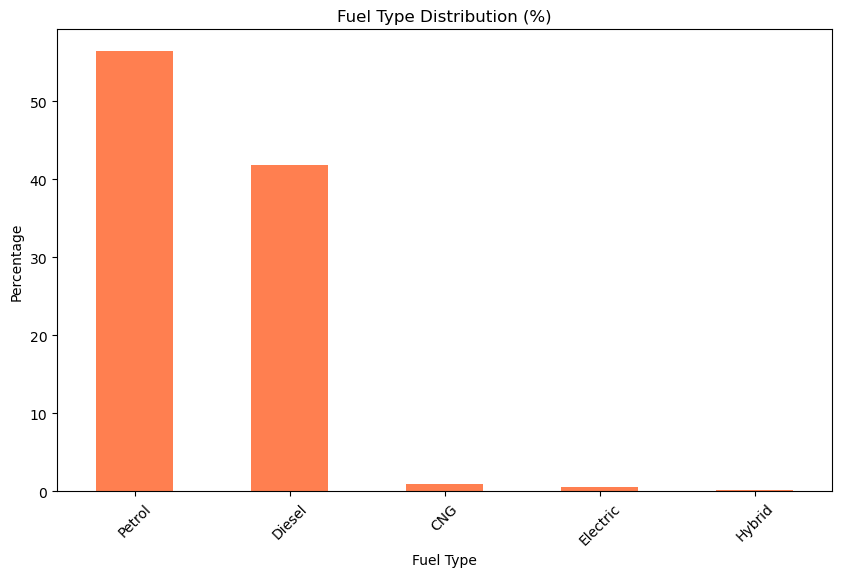

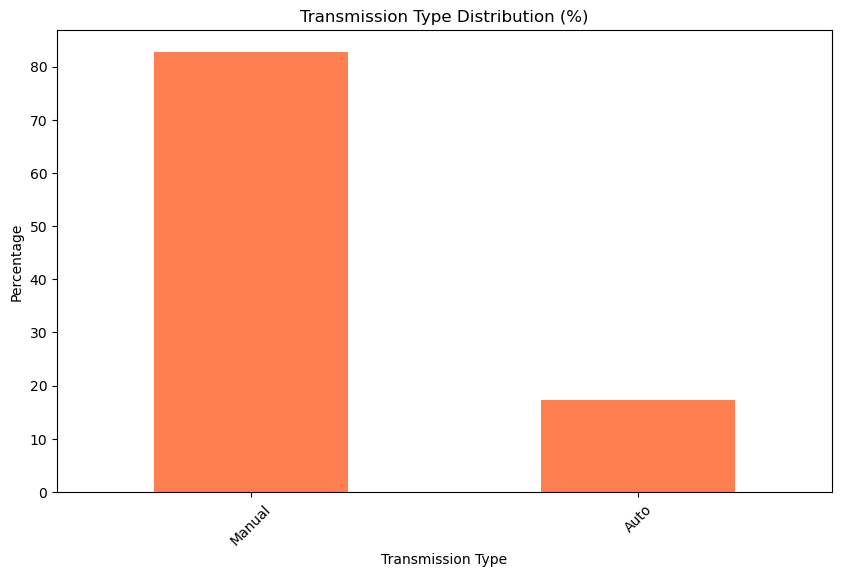

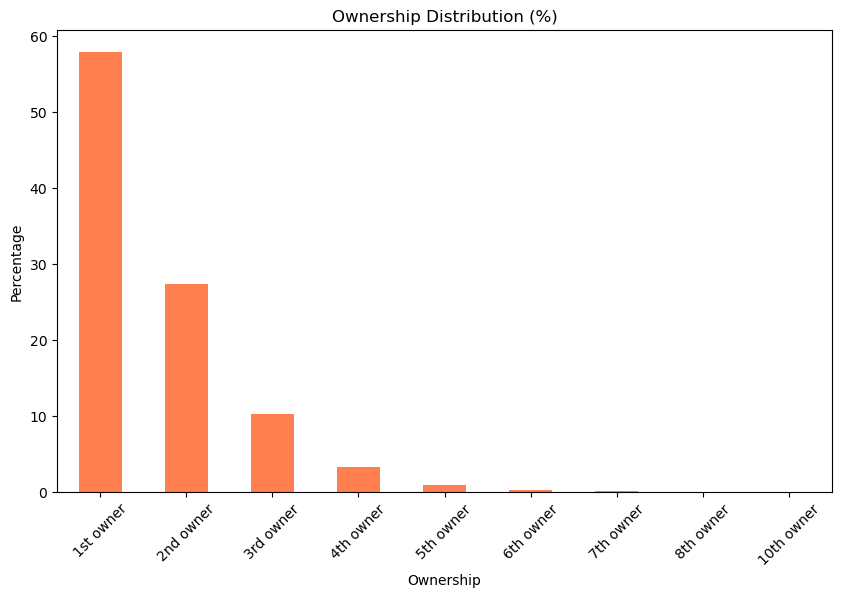

In [24]:
#How database looks like categorial distributions 
categorical_cols=['Fuel Type', 'Transmission Type', 'Ownership']
for col in categorical_cols:
    plt.figure(figsize=(10,6))
    (df[col].value_counts(normalize=True) * 100).plot(kind='bar', color='coral')
    plt.title(f"{col} Distribution (%)")
    plt.ylabel("Percentage")
    plt.xlabel(col)
    plt.xticks(rotation=45)
    plt.show()

Starting with EDA, I decided to look at percentage distributions of the categorical features like fuel type, transmission, ownership and car model. The reason for starting here is that it quickly tells me what my dataset is made up of. If I see that most cars are petrol, manual and first-owner, then I already understand the general trend before I even look at prices. This step is more about understanding the composition of the data rather than finding patterns yet.

***Observation***
My car Model and Location bar chart Look too massy because there are too many unique values in my database. Every new model, new Location getsa bar, so the x-axis becomes unreadable with overlapping labels. To fix this i will use fix number e.g. , top 10. 

The percentage distribution of car models shows that the dataset is dominated by popular mass-market cars. The Maruti Swift leads at just over 3%, followed closely by the Maruti Wagon R, Hyundai Creta, and Swift Dzire, each contributing around 2.5–2.9%. Other frequently listed models include the Maruti Baleno, Honda City, Hyundai Grand i10, Tata Nexon, Hyundai i10, and Hyundai Verna.

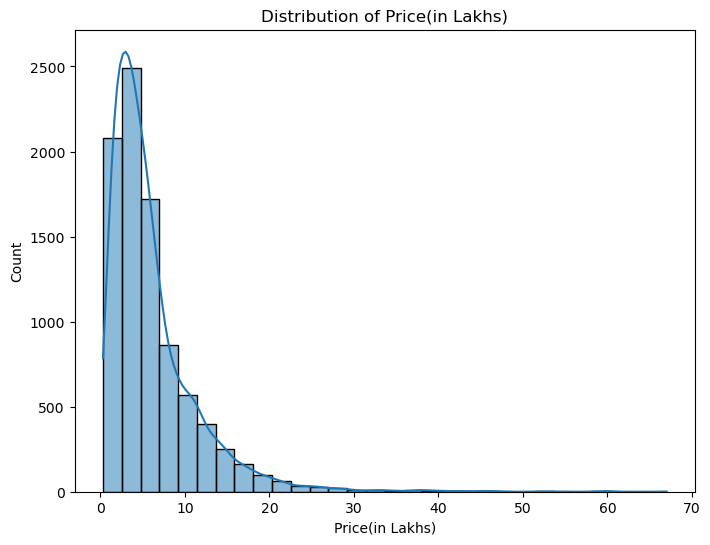

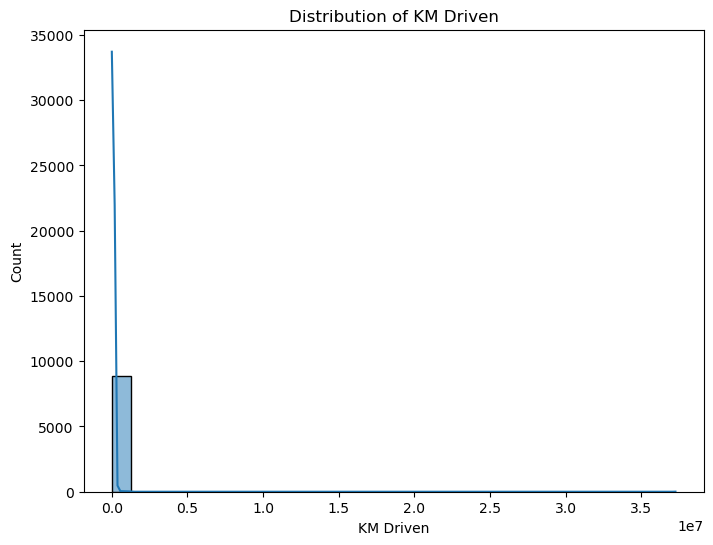

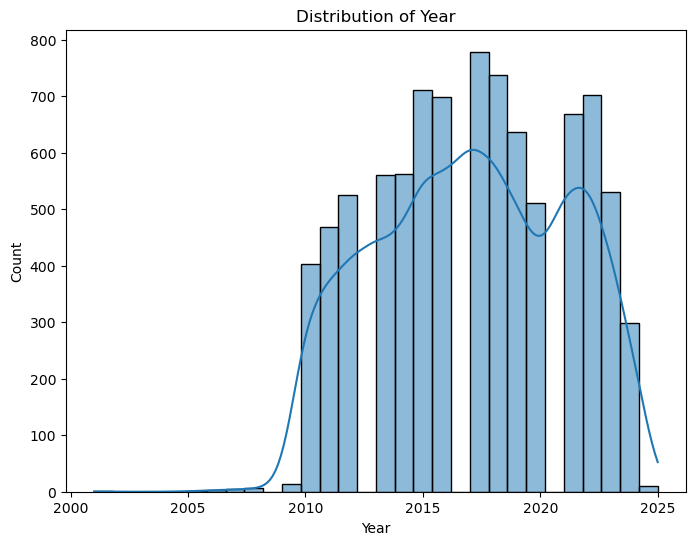

In [ ]:
#How the numbers behaves: Numeric Hisogram  
numeric_cols = ['Price(in Lakhs)', 'KM Driven', 'Year']

for col in numeric_cols:
    plt.figure(figsize=(8,6))
    sns.histplot(df[col].dropna(), bins=30, kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()



***Insight***
The resale price distribution is strongly positive-skewed, with most cars priced below 10 lakhs. A long tail extends up to luxury vehicles above 50 lakhs. The majority of the market represented here is budget to mid-range cars.The high-end models are form outliers.

The distribution of kilometers driven is highly positive-skewed. Most cars fall below 100,000 km, which is typical usage for resale cars, but there are extreme outliers with mileage above 200,000 km (and even unrealistic values in the millions). These extreme points stretch the scale and highlight the need for outlier handling.

The majority of vehicles were manufactured between 2012 and 2022, with strong peaks after 2015. Very few cars appear before 2010. This aligns with the Car Age pattern, confirming that most listed vehicles are relatively recent years.

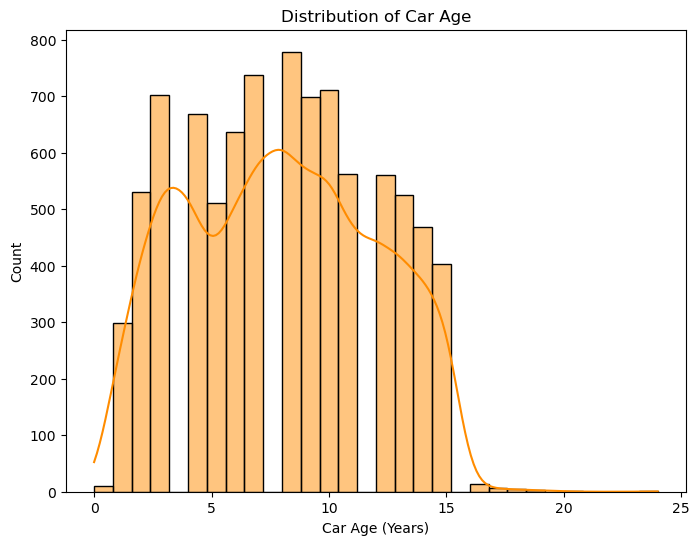

In [27]:
#Car Age for easier interpretation
df['Car Age'] = 2025 - df['Year']

plt.figure(figsize=(8,6))
sns.histplot(df['Car Age'].dropna(), bins=30, kde=True, color="darkorange")
plt.title("Distribution of Car Age")
plt.xlabel("Car Age (Years)")
plt.ylabel("Count")
plt.show()


***Insight***
Most cars in the dataset are under 10 years old, with a peak around 5–8 years. Very few cars are older than 15 years. This makes sense because buyers tend to avoid very old cars, and newer vehicles dominate the second-hand market. The distribution is positive-skewed, showing more younger cars and fewer older ones.

***What drives the Target variable, care resale price ***
this is the Heart of my EDA because it shows which factor affects resale value.I am going to understand the Target variable, car resale price.To do this I loked into boxplot, scatterplots and correlations. Boxplots helped me compare prices across different categories such as fuel type, transmission and ownership so I can see if one group generally sells for more than another. Scatterplots are useful for continuous variables like year and kilometers driven because they let me check if newer cars are really more expensive and whether high mileage reduces value. Finally, correlations give me a simple numerical summary of how strongly price is related to the other numeric features, which helps confirm the patterns I see in the graphs.in

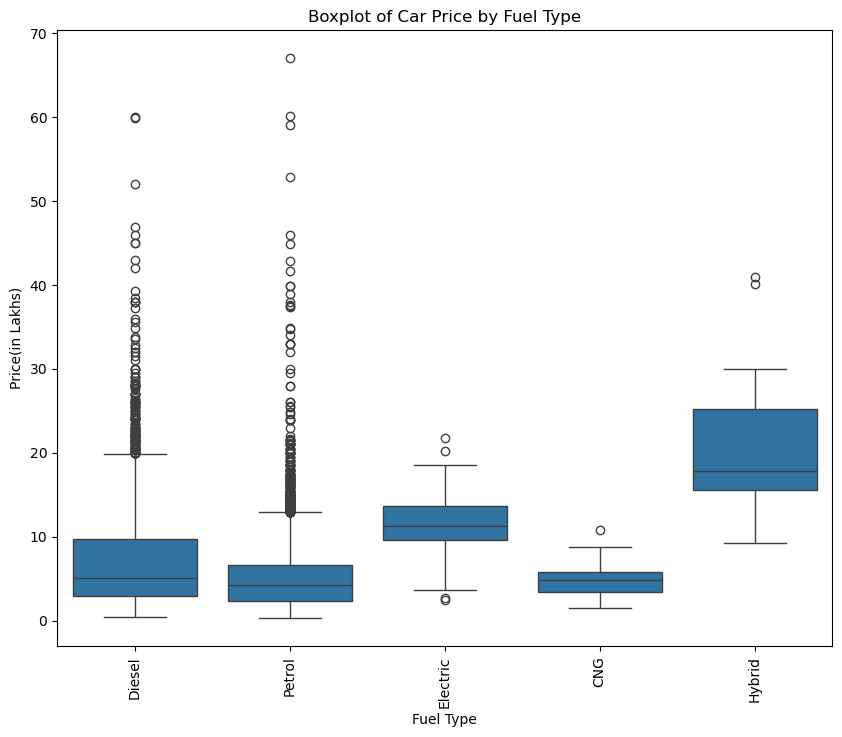

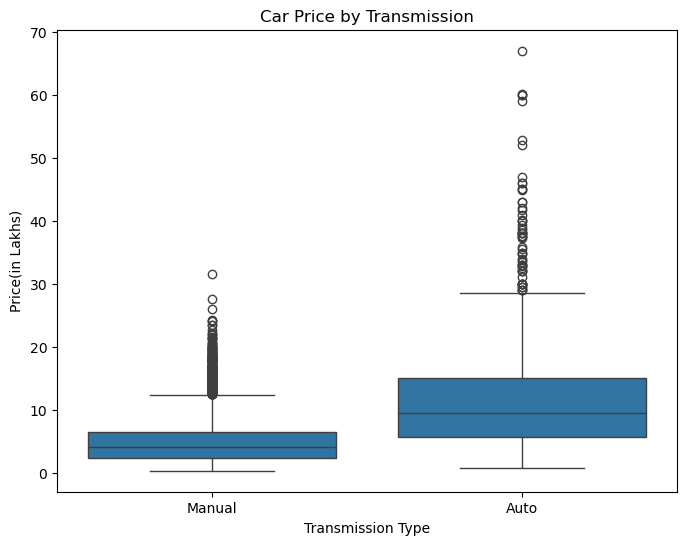

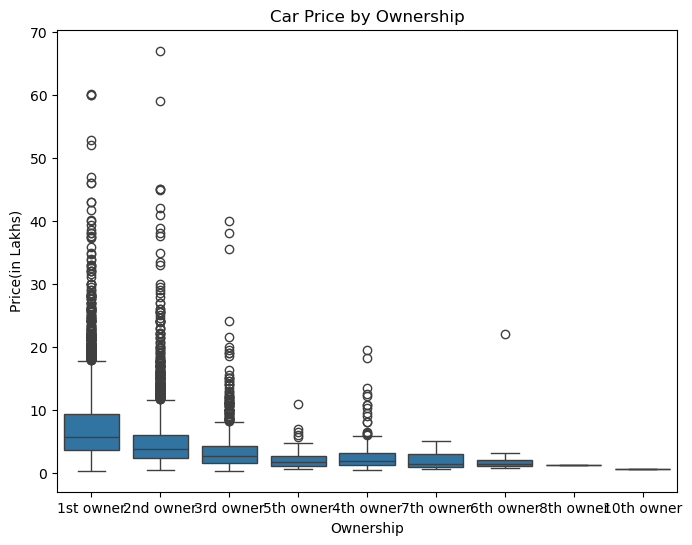

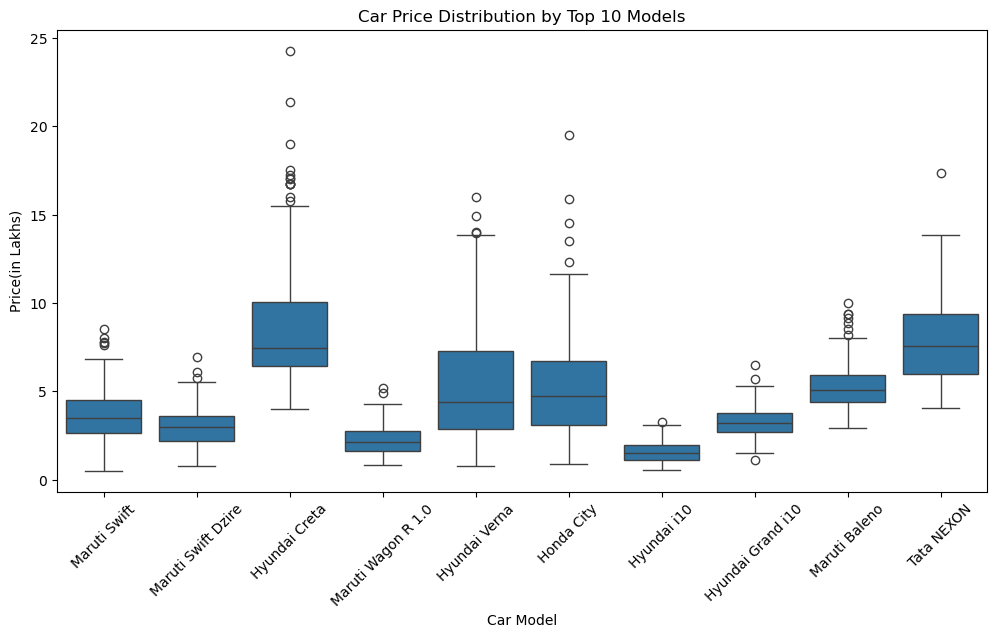

In [ ]:
#break things down by categories (fuel, transmission, ownership, model) and compare price within each group.
plt.figure(figsize=(10, 8))
plot = sns.boxplot(x='Fuel Type', y='Price(in Lakhs)', data=df)
plot.set_title('Boxplot of Car Price by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Price(in Lakhs)')
plt.xticks(rotation=90)
plt.show()

#Price vs Transmission
plt.figure(figsize=(8,6))
plot= sns.boxplot(x='Transmission Type', y='Price(in Lakhs)', data=df)
plot= plt.title("Car Price by Transmission")
plt.show()

# Price vs Ownership
plt.figure(figsize=(8,6))
plot= sns.boxplot(x='Ownership', y='Price(in Lakhs)', data=df)
plot= plt.title("Car Price by Ownership")
plt.show()

# Price vs Top 10 Car Models
top_models = df['Car Model'].value_counts().nlargest(10).index
plt.figure(figsize=(12,6))
sns.boxplot(x='Car Model', y='Price(in Lakhs)', data=df[df['Car Model'].isin(top_models)])
plt.xticks(rotation=45)
plt.title("Car Price Distribution by Top 10 Models")
plt.show()

***Insight***
When I looked at the boxplot of fuel type, it was clear that hybrids and electric cars sit much higher on the price scale compared to petrol or diesel. Petrol and diesel have lower medians but I noticed so many outliers shooting up.These are probably the premium or luxury brands that run on petrol or diesel. CNG is different; the prices are more tightly packed with hardly any big outliers.

For transmission, the story was very clear. Automatic cars not only had a higher median price but also a much wider spread. The tall whiskers and the many outliers show that autos cover everything from mid-range to luxury. Manuals, on the other hand, are more tightly grouped at the bottom, with just a few outliers going up past 10 lakhs.

The ownership boxplot was the most striking. First-owner cars obviously fetch the most money and they also had those high outliers sitting way above the rest. By the time you get to a second or third owner, the median drops and the outliers reduce too. Once it gets to fourth owner and beyond, the prices just collapse,hardly any outliers left.

Finally, when I checked the top 10 models, I could see some models clearly holding their value better. Hyundai Creta and Tata Nexon stand out, with higher medians and strong outliers. Honda City and Verna also show a wide spread with luxury cars pulling the outliers upwards. Meanwhile, Swift and Swift Dzire are at the lower end, clustered tightly with only small outliers, showing they don’t stretch into high resale values.

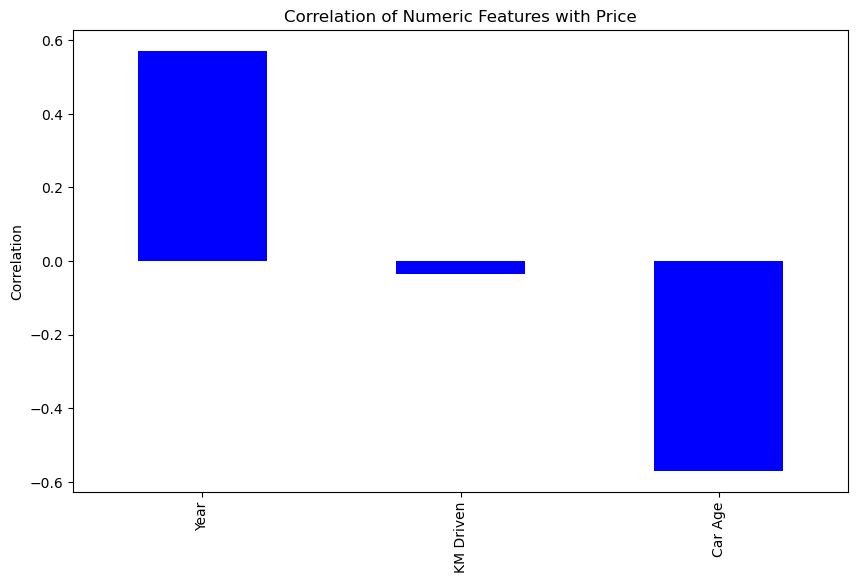

In [29]:
# define your numeric columns
numeric_cols = ['Price(in Lakhs)', 'Year', 'KM Driven', 'Car Age']

# correlation with Price
plt.figure(figsize=(10,6))
df[numeric_cols].corr()['Price(in Lakhs)'].drop('Price(in Lakhs)').sort_values(ascending=False).plot(kind='bar', color="blue")
plt.title("Correlation of Numeric Features with Price")
plt.ylabel("Correlation")
plt.show()

The correlation bar plot analyse shows the relationships between numerical features and the target variable Price in Lakhs. 
Year has strong positive relationship with price. Newer cars (higher years) are worth more. Which means recent models fetch higher resale prices. 
care age has negetive relationship with price. (-0.58) which means Older cars lose value quickly. 
KM Driven showing weak negetive relationship 
it simply measn that kilometers driven has almost no linear effect on price in this dataset.
**Observation**
Year and Car Age have much stronger effects, so they overshadow mileage. 
A 2022 car with 60,000 km might still sell higher than a 2010 car with only 30,000 km.

***Pair Plot***
After this I am using a pair plot to get a combined view of how the numeric features in my dataset relate to each other and to the target variable, price. A pair plot is useful because it gives me scatterplots for every pair of variables along with their individual distributions, so I can quickly see patterns across many comparisons in one figure. In my case it helps me check if newer cars are really priced higher, whether higher mileage reduces resale value, and if newer cars usually have fewer kilometers driven. This gives me a more visual and complete picture compared to just looking at correlation numbers

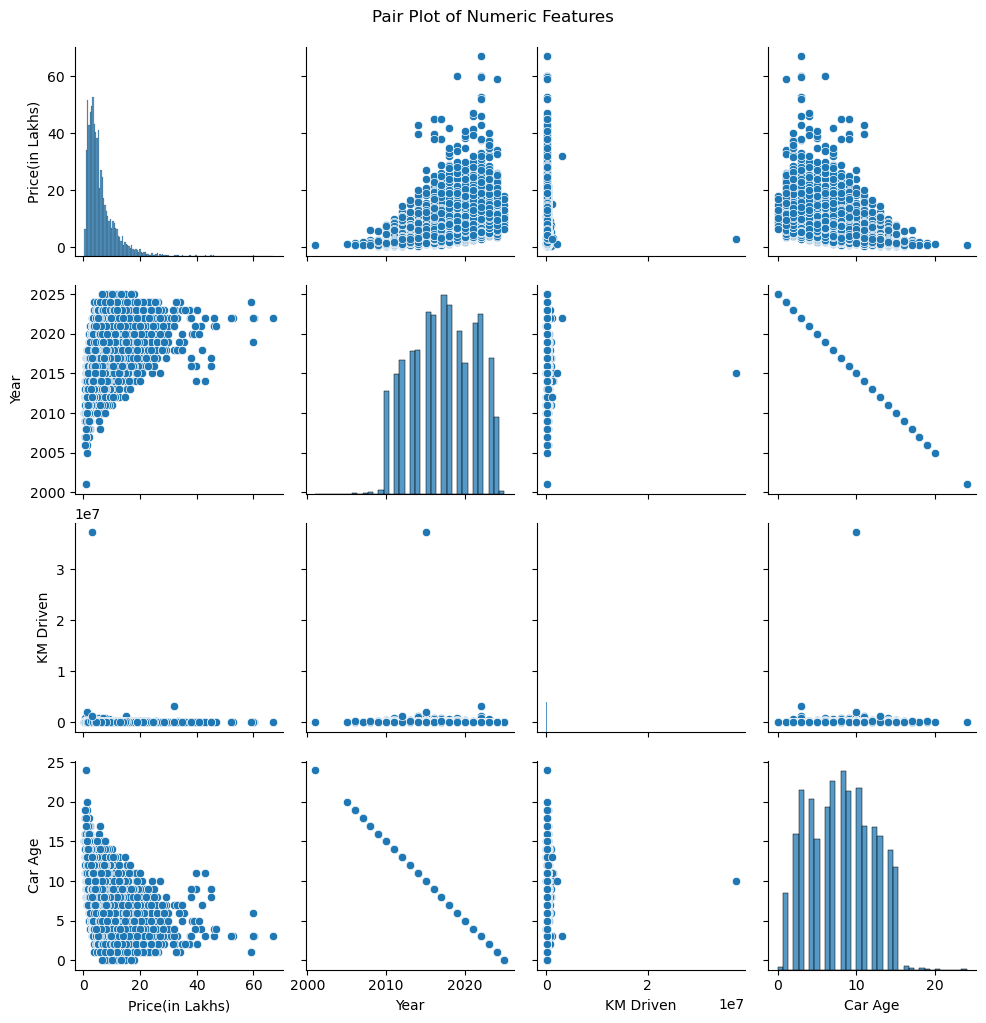

In [30]:
#Pair plot of numeric features 
pair_plot = sns.pairplot(df[['Price(in Lakhs)', 'Year', 'KM Driven', 'Car Age']])
pair_plot.fig.suptitle('Pair Plot of Numeric Features', y=1.02) 
plt.show()

**Insight** 
The pair plot is useful because it allows me to see both the individual distributions of my numeric features and how they relate to each other in one figure. 
On the diagonal, I can observe the histograms which show how each variable is spread out, such as car prices being skewed towards the lower range or car ages being mostly below fifteen years. The scatterplots show pairwise relationships, making it easier to notice patterns without having to plot each one separately. For example, I can clearly see that newer cars are priced higher, older cars lose value quickly, and mileage does not have a simple straight-line effect on price. This plot is powerful in giving me a quick overview of the data structure, highlighting which variables are strongly related and which ones are not.

                                                    ***Exploration***
                                                    
The main question I can explore with my Used Cars dataset is what factors affect the resale price of a used car, which is my Target variable is. Using histograms, I saw that price is skewed with most cars in the lower range, and kilometers driven had extreme outliers which I capped using the IQR method. I also created a new feature, car age, because it gave a clearer trend than year alone. Scatterplots, boxplots, correlations, and the pair plot all confirmed that newer cars are priced higher, older cars lose value quickly, and automatic cars usually cost more than manual ones. Cars with fewer owners also keep more value. Mileage showed almost no linear effect in the correlation, but scatterplots suggested that very high kilometers reduce price. I did not include location in my EDA because the dataset only lists seller addresses, but it could still be useful in the future if grouped into regions. At one point my EDA felt like “am I repeating myself?”, but i was showing different perspectives with different tools.

These findings are similar to what we might expect in the New Zealand used car market, where newer cars and fewer owners add value, but local factors like Japanese imports or coastal wear could make results different. This project gave me confidence that the data cleaning and EDA skills I used here can also be applied to a local dataset.